In [3]:
!unzip "/content/heart.zip"


Archive:  /content/heart.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving and loading models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings

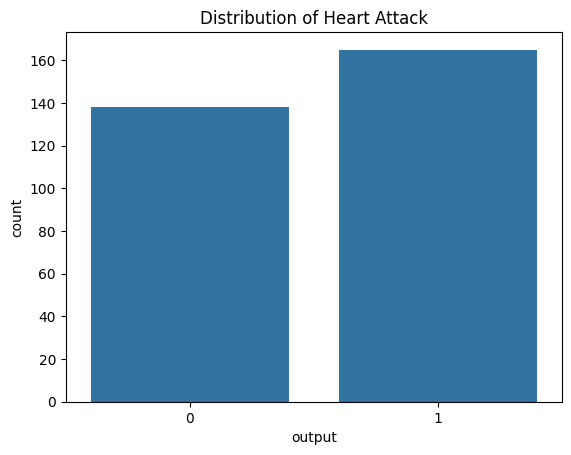

In [8]:
df = pd.read_csv("/content/heart.csv")

sns.countplot(data=df, x="output")
plt.title("Distribution of Heart Attack")
plt.show()

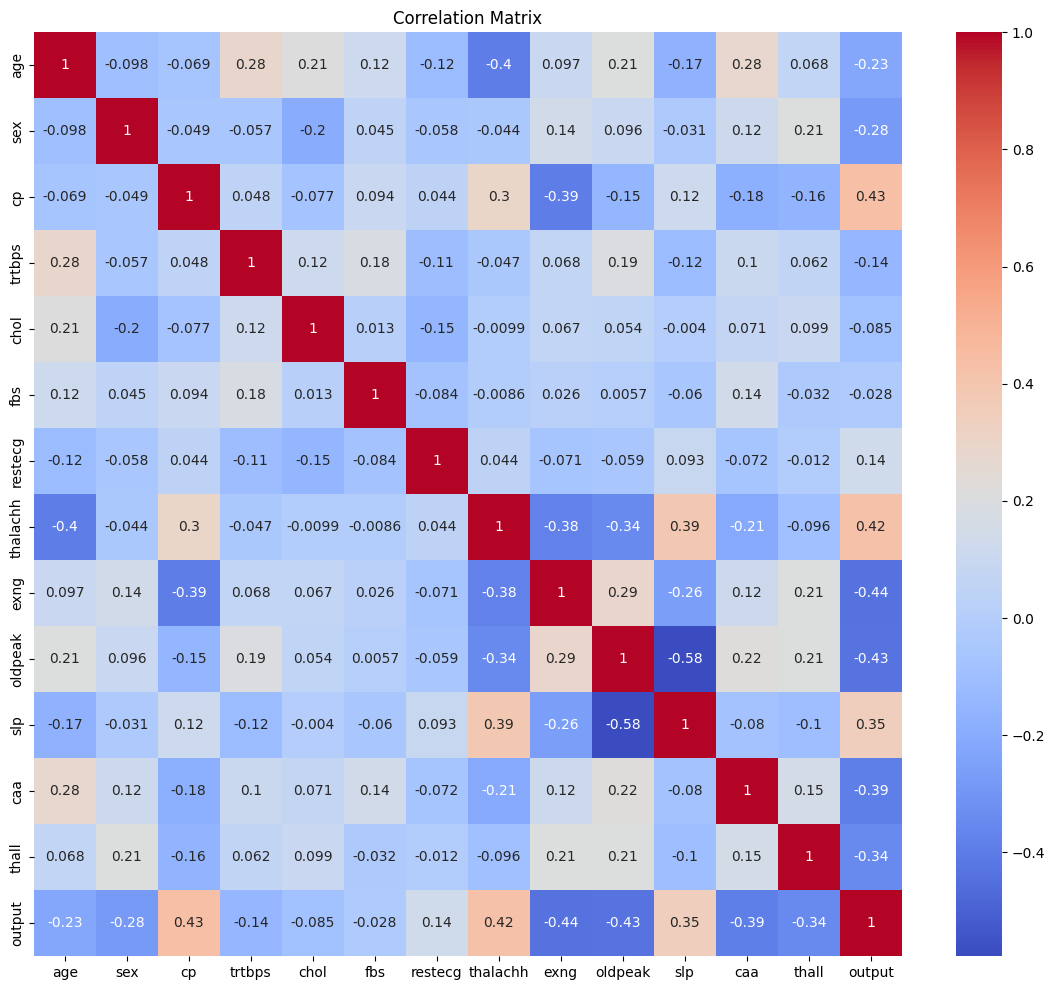

In [9]:
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [10]:
X = df.drop("output", axis=1)
y = df["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression())
    ]),
    "Random Forest": Pipeline([
        ('rf', RandomForestClassifier(random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

In [12]:
results = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy, 2)}")
    print(classification_report(y_test, y_pred))
    results[name] = accuracy

    # Save the model
    model_filename = f"{name.replace(' ', '_')}.joblib"
    joblib.dump(pipeline, model_filename)
    print(f"{name} saved as {model_filename}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Logistic Regression saved as Logistic_Regression.joblib
Training Random Forest...
Random Forest Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Random Forest saved as Random_Forest.joblib
Training XGBoost...
XGBoost Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.78   

In [13]:
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")


Best Model: Logistic Regression with Accuracy: 0.85


In [14]:
example_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Replace with new sample data


In [15]:
print("\nPredictions from all models:")
for name in pipelines.keys():
    # Load the saved model
    model_path = f"{name.replace(' ', '_')}.joblib"
    loaded_model = joblib.load(model_path)

    # Predict with the loaded model
    prediction = loaded_model.predict(example_data)
    result = "Heart Attack" if prediction[0] == 1 else "No Heart Attack"
    print(f"{name}: {result}")


Predictions from all models:
Logistic Regression: Heart Attack
Random Forest: Heart Attack
XGBoost: Heart Attack
